In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [40]:
card_df=pd.read_csv('data/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [41]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
def get_train_test_dataset(df=None):
    df_copy=get_preprocessed_df(df)
    df_feature=df_copy.iloc[:,:-1]
    df_label=df_copy.iloc[:,-1]
    X_train,X_test,y_train,y_test=train_test_split(df_feature,df_label,random_state=0,test_size=.3,
                                                  stratify=df_label)
    return X_train,X_test,y_train,y_test


In [44]:
print('label distribution in train set\n',y_train.value_counts()/y_train.shape[0]*100)
print('label distribution in test set\n',y_test.value_counts()/y_test.shape[0]*100)

label distribution in train set
 0    99.827451
1     0.172549
Name: Class, dtype: float64
label distribution in test set
 0    99.826785
1     0.173215
Name: Class, dtype: float64


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)

In [46]:
def get_scores(y_test,pred):
    print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
    print('Precision: {:.4f}'.format(precision_score(y_test,pred)))
    print('Recall: {:.4f}'.format(recall_score(y_test,pred)))
    print('f1_score: {:.4f}'.format(f1_score(y_test,pred)))
    print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_test,pred)))

In [47]:
get_scores(y_test,lr_pred)

Confusion Matrix:
 [[85281    14]
 [   58    90]]
Precision: 0.8654
Recall: 0.6081
f1_score: 0.7143
roc_auc_score: 0.8040


In [48]:
def get_model_train_eval(model,ftr_train=None,ftr_test=None,tgt_train=None,tgt_test=None):
    model.fit(ftr_train,tgt_train)
    pred=model.predict(ftr_test)
    get_scores(tgt_test,pred)

In [49]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

Confusion Matrix:
 [[85289     6]
 [   36   112]]
Precision: 0.9492
Recall: 0.7568
f1_score: 0.8421
roc_auc_score: 0.8783


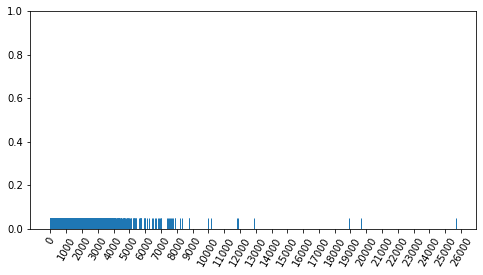

In [50]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.rugplot(card_df['Amount'])

In [101]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
    df_copy=df.copy()
    amount_n=np.log1p(df_copy['Amount'])
    df_copy.insert(0,'Amount_Scaled',amount_n)
    df_copy.drop(['Time','Amount'],axis=1,inplace=True)
    
    outlier_index=get_outlier(df=df_copy,column='V14')
    df_copy.drop(outlier_index,axis=0,inplace=True)
    return df_copy

In [54]:
X_train,X_test,y_train,y_test= get_train_test_dataset(card_df)

In [56]:
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

Confusion Matrix:
 [[85289     6]
 [   36   112]]
Precision: 0.9492
Recall: 0.7568
f1_score: 0.8421
roc_auc_score: 0.8783


In [58]:
X_train,X_test,y_train,y_test= get_train_test_dataset(card_df)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

Confusion Matrix:
 [[85290     5]
 [   35   113]]
Precision: 0.9576
Recall: 0.7635
f1_score: 0.8496
roc_auc_score: 0.8817


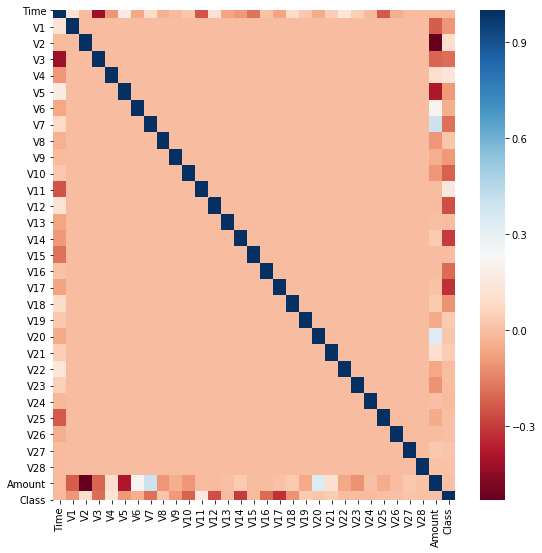

In [66]:
plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')

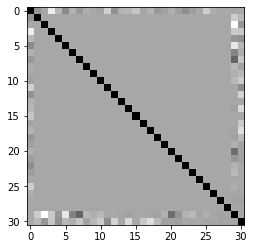

In [74]:
plt.imshow(corr,cmap='binary')

In [86]:
corr['Class'].sort_values().head()

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
Name: Class, dtype: float64

In [99]:
def get_outlier(df=None,column=None,weight=1.5):
    fraud=df[df['Class']==1][column]
    quantile_25=np.percentile(fraud.values,25)
    quantile_75=np.percentile(fraud.values,75)
    
    boundary=quantile_75-quantile_25
    iqr_weight=boundary*weight
    lowest_val=quantile_25-iqr_weight
    highest_val=quantile_75+iqr_weight
    outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
    return outlier_index

In [100]:
outlier_index=get_outlier(card_df,'V14')
print(outlier_index)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [102]:
X_train,X_test,y_train,y_test= get_train_test_dataset(card_df)
get_model_train_eval(lgbm_clf,X_train,X_test,y_train,y_test)

Confusion Matrix:
 [[85291     4]
 [   25   121]]
Precision: 0.9680
Recall: 0.8288
f1_score: 0.8930
roc_auc_score: 0.9144


In [103]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)
X_train_over,y_train_over=smote.fit_sample(X_train,y_train)
print('Before SMOTE train feature/label set:',X_train.shape,y_train.shape)
print('After SMOTE train feature/label set:',X_train_over.shape,y_train_over.shape)
print('Label Distribution After SMOTE:',pd.Series(y_train_over).value_counts())

Before SMOTE train feature/label set: (199362, 29) (199362,)
After SMOTE train feature/label set: (398040, 29) (398040,)
Label Distribution After SMOTE: 1    199020
0    199020
Name: Class, dtype: int64


In [108]:
get_model_train_eval(lr_clf,X_train_over,X_test,y_train_over,y_test)

Confusion Matrix:
 [[82937  2358]
 [   11   135]]
Precision: 0.0542
Recall: 0.9247
f1_score: 0.1023
roc_auc_score: 0.9485


In [113]:
get_model_train_eval(lgbm_clf,X_train_over,X_test,y_train_over,y_test)

Confusion Matrix:
 [[85286     9]
 [   22   124]]
Precision: 0.9323
Recall: 0.8493
f1_score: 0.8889
roc_auc_score: 0.9246


In [114]:
from sklearn.metrics import precision_recall_curve
pred_proba=lr_clf.predict_proba(X_test)[:,1]
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba)

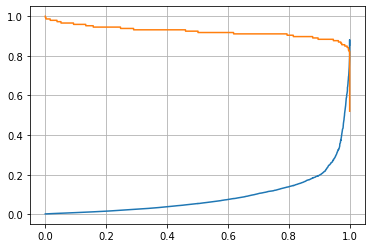

In [132]:
plt.plot(thresholds,precisions)
plt.plot(thresholds,recalls)
plt.grid()

In [139]:
thresholds[78537]

0.9999871642659937